# **Descripción del Dataset**

Importacion de Librerias


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
# Librería: scikit learn, "sklearn"
# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix

Obtencion de los datos

In [ ]:
# Leer datos

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
datos = pd.read_csv("/content/drive/MyDrive/G03_corte.csv", sep=',', header=0)
datos = datos.drop(datos.columns[[0, 1]], axis=1)
datos.head()

Mounted at /content/drive


,1,2,3,4,5,6,7,8,9,10,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,90000
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S05E01
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S05E01
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S05E01
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S05E01
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,S05E01


In [ ]:
#DECRIPCIÓN DEL DATA SET
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Columns: 90000 entries, 1 to 90000
dtypes: int64(89999), object(1)
memory usage: 370.8+ MB


*Después de utilizar la función info obtenemos lo siguiente:*


*   **NRO DE FILAS:** 540 filas, que corresponden a las 18 variedades de papas obtenidas en campo.
*   **NRO DE COLUMNAS:** 90000, las cuales corresponden a la imagen vectorizada y redimensionada a 300x300px
*  **DTYPES:** El tipo de datos de nuestro data set son enteros y 1 objeto
*   **MEMORIA USADA:** Se utlizaron aproximadamente 370.8 MB de memoria



In [ ]:
#MÉTRICAS ESTADÍSITICAS SOBRE EL DATASET
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
2,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
3,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
4,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
5,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...
89995,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
89996,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
89997,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0
89998,540.0,255.0,0.0,255.0,255.0,255.0,255.0,255.0


Distribucion de las clases

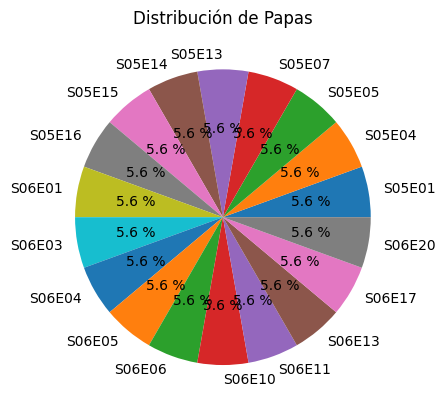

In [ ]:
distribucion = datos.groupby('90000').size()
plt.pie(distribucion, labels = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20'], autopct ="%0.1f %%")
plt.title('Distribución de Papas')
plt.show()


El Dataset G03_papas1.csv de datos de papas consiste en información sobre imágenes vectorizadas de papas de 18 variedades diferentes: 'S05E01', 'S05E04', 'S05E05', 'S05E07', 'S05E13', 'S05E14', 'S05E15', 'S05E16', 'S06E01', 'S06E03', 'S06E04', 'S06E05', 'S06E06', 'S06E10', 'S06E11', 'S06E13', 'S06E17' y 'S06E20'.

Cada imagen vectorizada de papa tiene características asociadas que se utilizarán para clasificar la variedad a la que pertenece. Estas características pueden incluir información sobre la forma, el tamaño, el color u otras características relevantes de las papas.

# **Experimentos realizados**

## **a) Modelo 1 - KNN**

### **1. Experimento_01**

#### Ejecución

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.33
random_state=18
n_neighbors = 2

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = n_neighbors)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
print(Exactitud)
tiempo = time.time() - inicio

NameError: name 'datos' is not defined

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: KNN")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("n_neighbors = ", n_neighbors)

df.head()

### **2. Experimento_02**

#### Ejecución

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.25
random_state=34
n_neighbors = 3
# Sparación de datos para entrenamiento y test
X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = n_neighbors)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test2, y_test2)
print(Exactitud)
tiempo = time.time() - inicio

0.4962962962962963


#### Matriz de confusion

In [ ]:
# Test del modelo
pred2 = Modelo.predict(X_test2)
# Matriz de confusión
matriz2 = confusion_matrix(y_test2, pred2)
print(matriz2)

[[3 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 6 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 3 1 3 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 4 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 9 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 1 0 4 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 2 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 2 0 0 5 0 0 0 0]
 [1 3 0 0 0 1 0 0 0 0 3 0 0 2 0 0 0 0]
 [2 0 0 0 0 1 0 0 1 0 2 0 0 1 0 0 0 0]
 [1 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1]]


<Axes: >

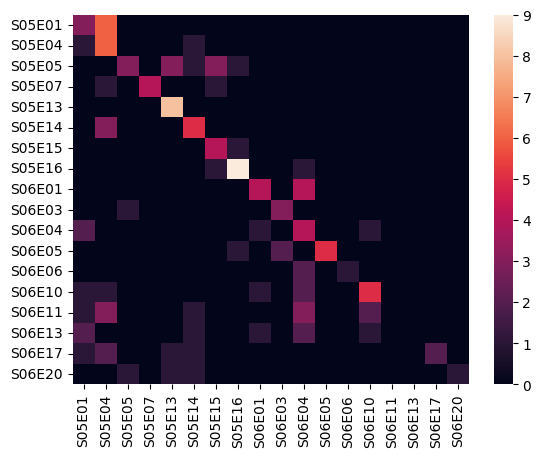

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz2, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test2, pred2)
precision = precision_score(y_test2, pred2, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test2, pred2, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test2, pred2, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: KNN")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("n_neighbors = ", n_neighbors)

df.head()

--------------------------------
Metodo de clasificacion: KNN
--------------------------------
Hiperparametros utilizados:
test_size =  0.25
random_state =  34
n_neighbors =  3


,Métrica,Valor
0,Exactitud,0.496296
1,Precisión,0.496296
2,Recall,0.496296
3,F1-score,0.496296
4,Tiempo de ejecución,3.854513


### **3. Experimento_03**

#### Ejecución

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.40
random_state=14
n_neighbors = 2

# Sparación de datos para entrenamiento y test
X_train, X_test3, y_train, y_test3= train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = n_neighbors)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test3, y_test3)
print(Exactitud)
tiempo = time.time() - inicio

0.4166666666666667


#### Matriz de confusion

In [ ]:
# Test del modelo
pred3 = Modelo.predict(X_test3)
# Matriz de confusión
matriz3 = confusion_matrix(y_test3, pred3)
print(matriz3)

[[ 4  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7  1  4  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  7  2  0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  1  0 10  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  1  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  7  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  7  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  2  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  4  0  0  0  0]
 [ 2  2  0  1  3  0  0  1  1  0  4  0  0  3  0  0  0  0]
 [ 2  1  0  0  0  1  0  0  1  0  3  0  0  6  0  0  1  0]
 [ 1  3  0  0  2  3  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  1  1  3  5  2  2  0  0  0

<Axes: >

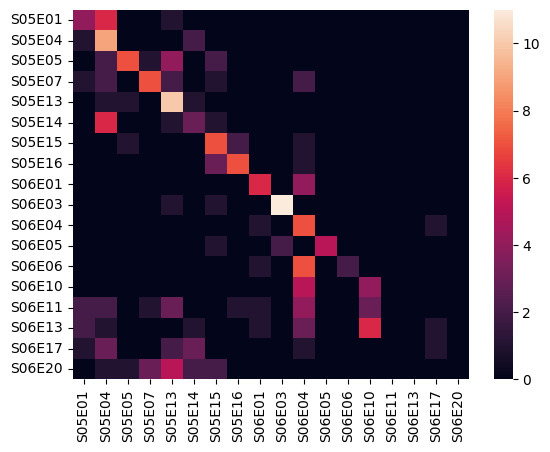

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz3, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: KNN")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("n_neighbors = ", n_neighbors)

df.head()

--------------------------------
Metodo de clasificacion: KNN
--------------------------------
Hiperparametros utilizados:
test_size =  0.4
random_state =  14
n_neighbors =  2


,Métrica,Valor
0,Exactitud,0.416667
1,Precisión,0.416667
2,Recall,0.416667
3,F1-score,0.416667
4,Tiempo de ejecución,2.199481


## **b) Modelo 2 - Naive Bayes**

In [ ]:
# librerías generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerías para métricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerías para Naive Bayes
from sklearn.naive_bayes import GaussianNB

### **1. Experimento_01**

#### Ejecución

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
random_state=70
train_size=0.75

X=datos.drop(['90000'],axis=1)
y=datos['90000']
 #Separa datos en entrenamientos y test
X_train,X_test4,y_train,y_test4=train_test_split(X,y,random_state=random_state,train_size=train_size)
X_train.head()


#crear objeto NaiveBayes
NaiveBayes=GaussianNB()
#Entrenamiento
inicio = time.time()
Modelo = NaiveBayes.fit(X_train, y_train)

# Exactitud del entrenamiento
Exactitud =Modelo.score(X_test4,y_test4)
print(Exactitud)


0.2814814814814815


#### Matriz de confusion

In [ ]:
# Test del modelo
pred4 = Modelo.predict(X_test4)
# Matriz de confusión
matriz4 = confusion_matrix(y_test4, pred4)
print(matriz4)

[[2 2 0 0 3 0 0 0 0 0 1 0 0 0 0 0 2 0]
 [0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1]
 [0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [1 0 0 0 3 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 3 3 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 2 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 0 0 1 1 2 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 4 5 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 3 0 5 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0 3 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 2 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 1 2 0 0 0 0]
 [0 0 1 0 0 0 3 1 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 3 1 0 1 1 0 0 1 1 1 0]
 [0 2 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 2 0 1 0 0 0 0 0 0 2 0 0 0 0 1 1]]


<Axes: >

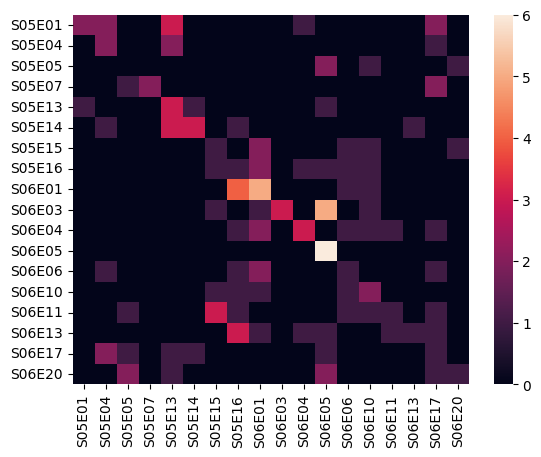

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz4, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test4, pred4)
precision = precision_score(y_test4, pred4, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test4, pred4, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test4, pred4, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: Naive Bayes ")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ",random_state)
print("random_state = ",train_size)

df.head()

--------------------------------
Metodo de clasificacion: Naive Bayes 
--------------------------------
Hiperparametros utilizados:
test_size =  70
random_state =  0.75


,Métrica,Valor
0,Exactitud,0.281481
1,Precisión,0.281481
2,Recall,0.281481
3,F1-score,0.281481
4,Tiempo de ejecución,8.900411


### **2. Experimento_02**

#### Ejecución

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
random_state=60
train_size=0.97


X=datos.drop(['90000'],axis=1)
y=datos['90000']
 #Separa datos en entrenamientos y test
X_train,X_test5,y_train,y_test5=train_test_split(X,y,random_state=random_state,train_size=train_size)
X_train.head()


#crear objeto NaiveBayes
NaiveBayes=GaussianNB()
#Entrenamiento
inicio = time.time()
Modelo = NaiveBayes.fit(X_train, y_train)

# Exactitud del entrenamiento
Exactitud =Modelo.score(X_test5,y_test5)
print(Exactitud)

0.4117647058823529


#### Matriz de confusion

In [ ]:
# Test del modelo
pred5 = Modelo.predict(X_test5)
# Matriz de confusión
matriz5 = confusion_matrix(y_test5, pred5)
print(matriz5)

[[1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0]]


<Axes: >

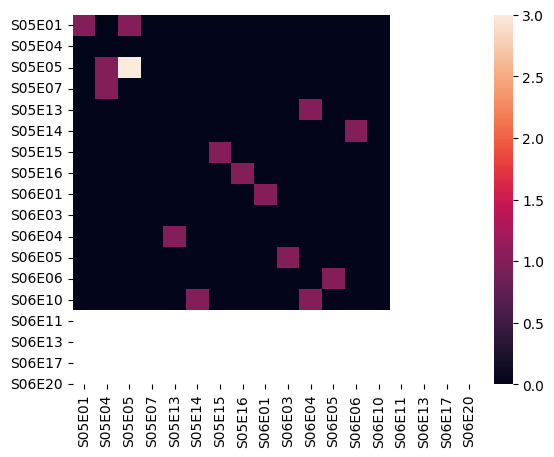

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz5, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test5, pred5)
precision = precision_score(y_test5, pred5, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test5, pred5, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test5, pred5, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: Naive Bayes ")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ",random_state)
print("random_state = ",train_size)

df.head()

--------------------------------
Metodo de clasificacion: Naive Bayes 
--------------------------------
Hiperparametros utilizados:
test_size =  60
random_state =  0.97


,Métrica,Valor
0,Exactitud,0.411765
1,Precisión,0.411765
2,Recall,0.411765
3,F1-score,0.411765
4,Tiempo de ejecución,8.900411


### **3. Experimento_03**

#### Ejecución

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
random_state=86
train_size=0.86


X=datos.drop(['90000'],axis=1)
y=datos['90000']
 #Separa datos en entrenamientos y test
X_train,X_test6,y_train,y_test6=train_test_split(X,y,random_state=random_state,train_size=train_size)
X_train.head()


#crear objeto NaiveBayes
NaiveBayes=GaussianNB()
#Entrenamiento
inicio = time.time()
Modelo = NaiveBayes.fit(X_train, y_train)

# Exactitud del entrenamiento
Exactitud =Modelo.score(X_test6,y_test6)
print(Exactitud)

0.3684210526315789


#### Matriz de confusion

In [ ]:
# Test del modelo
pred6 = Modelo.predict(X_test6)
# Matriz de confusión
matriz6= confusion_matrix(y_test6, pred6)
print(matriz6)

[[0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 1]
 [1 1 0 0 2 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]]


<Axes: >

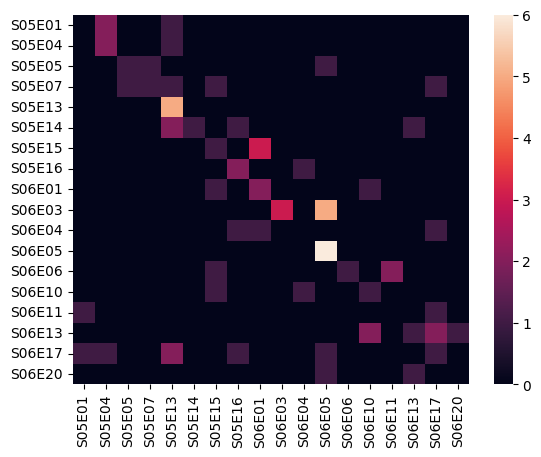

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz6, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test6, pred6)
precision = precision_score(y_test6, pred6, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test6, pred6, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test6, pred6, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: Naive Bayes ")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ",random_state)
print("random_state = ",train_size)

df.head()

--------------------------------
Metodo de clasificacion: Naive Bayes 
--------------------------------
Hiperparametros utilizados:
test_size =  86
random_state =  0.86


,Métrica,Valor
0,Exactitud,0.368421
1,Precisión,0.368421
2,Recall,0.368421
3,F1-score,0.368421
4,Tiempo de ejecución,8.900411


## **c) Modelo 3 - Árboles de decisión**

### **1. Experimento_01**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
#  Indice de impureza GINI: (CRITERION)
#  Max profundidad del árbol: (max_depth)
train_size = 0.8
random_state=5
criterion = 'gini'
max_depth= 160
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size= train_size)
ArbolDecision= DecisionTreeClassifier(criterion = criterion, max_depth=max_depth)
#Ordenar el árbol de decision
inicio = time.time()
ArbolDecision.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=max_depth)
# Test del modelo
Exactitud =ArbolDecision.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = ArbolDecision.predict(X_test)
# Matriz de confusión
matriz10 = confusion_matrix(y_test, pred)
print(matriz10)

[[108]]


<Axes: >

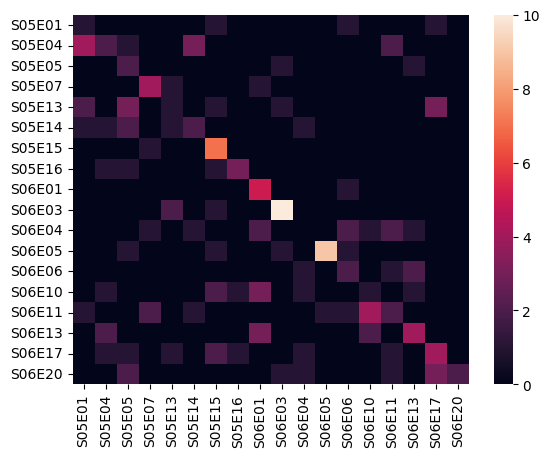

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz3, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("------------------------------------------------")
print("Metodo de clasificacion: ÁRBOLES DE DECISIÓN")
print("------------------------------------------------")
print("Hiperparametros utilizados:")
print("train_size = ", train_size)
print("random_state = ", random_state)
print("criterion = ", criterion)
print("max_depth = ", max_depth)

df.head()

------------------------------------------------
Metodo de clasificacion: ÁRBOLES DE DECISIÓN
------------------------------------------------
Hiperparametros utilizados:
train_size =  0.8
random_state =  5
criterion =  gini
max_depth =  160


,Métrica,Valor
0,Exactitud,0.416667
1,Precisión,0.416667
2,Recall,0.416667
3,F1-score,0.416667
4,Tiempo de ejecución,23.666205


### **2. Experimento_02**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
#  Indice de impureza ENTROPY: (CRITERION)
#  Max profundidad del árbol: (max_depth)
train_size = 0.8
random_state=5
criterion = 'entropy'
max_depth= 160
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size= train_size)
ArbolDecision= DecisionTreeClassifier(criterion = criterion, max_depth=max_depth)
#Ordenar el árbol de decision
inicio = time.time()
ArbolDecision.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=max_depth)
# Test del modelo
Exactitud =ArbolDecision.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = ArbolDecision.predict(X_test)
# Matriz de confusión
matriz11 = confusion_matrix(y_test, pred)
print(matriz11)

[[108]]


<Axes: >

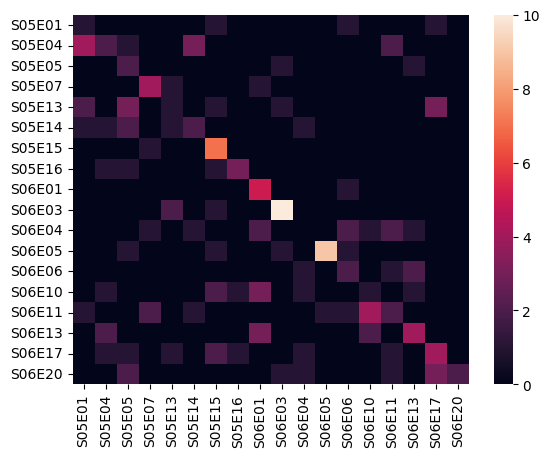

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz3, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("------------------------------------------------")
print("Metodo de clasificacion: ÁRBOLES DE DECISIÓN")
print("------------------------------------------------")
print("Hiperparametros utilizados:")
print("train_size = ", train_size)
print("random_state = ", random_state)
print("criterion = ", criterion)
print("max_depth = ", max_depth)

df.head()

------------------------------------------------
Metodo de clasificacion: ÁRBOLES DE DECISIÓN
------------------------------------------------
Hiperparametros utilizados:
train_size =  0.8
random_state =  5
criterion =  entropy
max_depth =  160


,Métrica,Valor
0,Exactitud,0.416667
1,Precisión,0.416667
2,Recall,0.416667
3,F1-score,0.416667
4,Tiempo de ejecución,34.554466


### **3. Experimento_03**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
#  Indice de impureza GINI: (CRITERION)
#  Max profundidad del árbol: (max_depth)
train_size = 0.92
random_state=5
criterion = 'gini'
max_depth= 190
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, train_size= train_size)
ArbolDecision= DecisionTreeClassifier(criterion = criterion, max_depth=max_depth)
#Ordenar el árbol de decision
inicio = time.time()
ArbolDecision.fit(X_train,y_train)
DecisionTreeClassifier(max_depth=max_depth)
# Test del modelo
Exactitud =ArbolDecision.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = ArbolDecision.predict(X_test)
# Matriz de confusión
matriz12 = confusion_matrix(y_test, pred)
print(matriz12)

[[44]]


<Axes: >

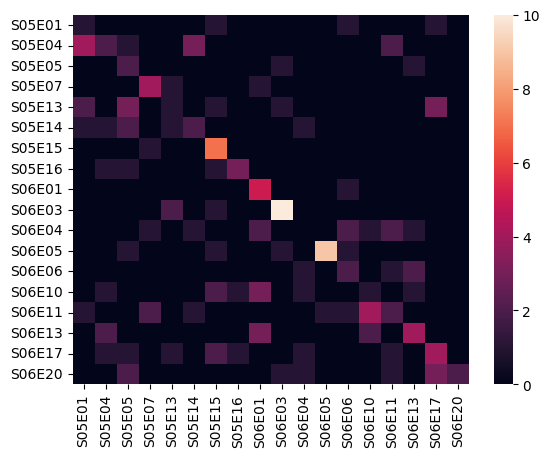

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz3, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("------------------------------------------------")
print("Metodo de clasificacion: ÁRBOLES DE DECISIÓN")
print("------------------------------------------------")
print("Hiperparametros utilizados:")
print("train_size = ", train_size)
print("random_state = ", random_state)
print("criterion = ", criterion)
print("max_depth = ", max_depth)

df.head()

------------------------------------------------
Metodo de clasificacion: ÁRBOLES DE DECISIÓN
------------------------------------------------
Hiperparametros utilizados:
train_size =  0.92
random_state =  5
criterion =  gini
max_depth =  190


,Métrica,Valor
0,Exactitud,0.363636
1,Precisión,0.363636
2,Recall,0.363636
3,F1-score,0.363636
4,Tiempo de ejecución,22.366138


## **d) Modelo 4 - RNA Perceptrón**

### **1. Experimento_01**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.33
random_state=50
#UTILIZAREMOS EL CÓDIGO DE MULTICAPA CON LAS CONDIONES SIGUIENTES:
# 1 NEURONA Y 1 CAPA
hidden_layer_sizes=(1,)
alpha=0.01
activation='tanh'
max_iter=30

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha, activation=activation, max_iter=max_iter)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[179]]


<Axes: >

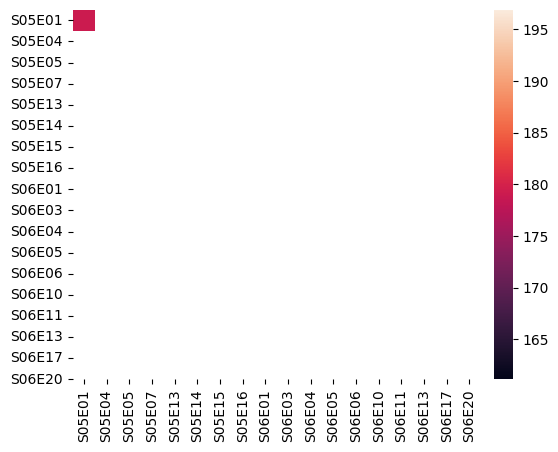

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("------------------------------------------------------------------------")
print("Metodo de clasificacion: MLP PARA UNA NEURONA Y UNA CAPA")
print("------------------------------------------------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("hidden_layer_sizes", hidden_layer_sizes)
print("alpha", alpha)
print("activation", activation)
print("max_iter", max_iter)

df.head()

------------------------------------------------------------------------
Metodo de clasificacion: MLP PARA UNA NEURONA Y UNA CAPA
------------------------------------------------------------------------
Hiperparametros utilizados:
test_size =  0.33
random_state =  50
hidden_layer_sizes (1,)
alpha 0.01
activation tanh
max_iter 30


,Métrica,Valor
0,Exactitud,1.0000
1,Precisión,1.0000
2,Recall,1.0000
3,F1-score,1.0000
4,Tiempo de ejecución,26.9008


### **2. Experimento_02**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.33
random_state=50
#UTILIZAREMOS EL CÓDIGO DE MULTICAPA CON LAS CONDIONES SIGUIENTES:
# 1 NEURONA Y 1 CAPA
hidden_layer_sizes=(1,)
alpha=0.05
activation='logistic'
max_iter=30

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha, activation=activation, max_iter=max_iter)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[179]]


<Axes: >

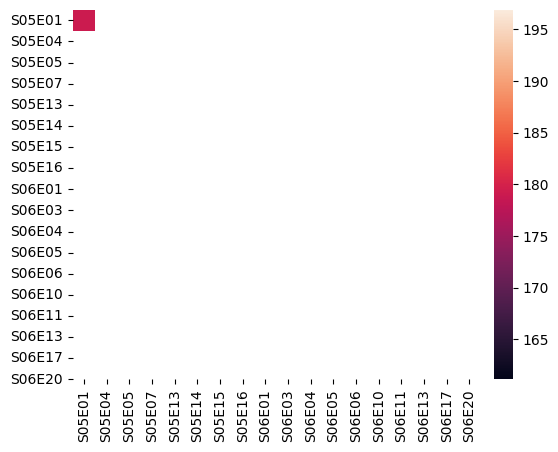

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("------------------------------------------------------------------------")
print("Metodo de clasificacion: MLP PARA UNA NEURONA Y UNA CAPA")
print("------------------------------------------------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("hidden_layer_sizes", hidden_layer_sizes)
print("alpha", alpha)
print("activation", activation)
print("max_iter", max_iter)

df.head()

------------------------------------------------------------------------
Metodo de clasificacion: MLP PARA UNA NEURONA Y UNA CAPA
------------------------------------------------------------------------
Hiperparametros utilizados:
test_size =  0.33
random_state =  50
hidden_layer_sizes (1,)
alpha 0.05
activation logistic
max_iter 30


,Métrica,Valor
0,Exactitud,1.000000
1,Precisión,1.000000
2,Recall,1.000000
3,F1-score,1.000000
4,Tiempo de ejecución,23.733897


### **3. Experimento_03**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparámetros
test_size = 0.35
random_state = 5
hidden_layer_sizes = (1,)
alpha = 0.01
activation = 'logistic'
max_iter = 40

# Separación de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Definición del modelo con una sola capa y una neurona
modelo34 = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                       alpha=alpha, activation=activation, max_iter=max_iter,
                       solver='sgd', learning_rate_init=0.1)

inicio = time.time()
# Entrenamiento del modelo
modelo34.fit(X_train, y_train)

# Evaluación del modelo
exactitud = modelo34.score(X_test, y_test)
tiempo = time.time() - inicio


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Matriz de confusion

In [ ]:
# Test del modelo
pred =modelo34.predict(X_test)
# Matriz de confusión
matriz8 = confusion_matrix(y_test, pred)
print(matriz8)

[[189]]


<Axes: >

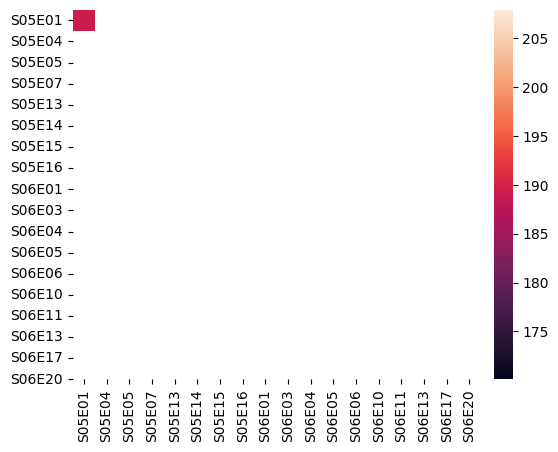

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz8, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("------------------------------------------------------------------------")
print("Metodo de clasificacion: MLP PARA UNA NEURONA Y UNA CAPA")
print("------------------------------------------------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("hidden_layer_sizes", hidden_layer_sizes)
print("alpha", alpha)
print("activation", activation)
print("max_iter", max_iter)

df.head()

------------------------------------------------------------------------
Metodo de clasificacion: MLP PARA UNA NEURONA Y UNA CAPA
------------------------------------------------------------------------
Hiperparametros utilizados:
test_size =  0.35
random_state =  5
hidden_layer_sizes (1,)
alpha 0.01
activation logistic
max_iter 40


,Métrica,Valor
0,Exactitud,1.00000
1,Precisión,1.00000
2,Recall,1.00000
3,F1-score,1.00000
4,Tiempo de ejecución,30.45793


## **e) Modelo 5 - RNA Perceptrón Multicapa**

### **1. Experimento_01**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.35
random_state=5
hidden_layer_sizes=(100, 200, 100, 30)
alpha=0.01
activation='logistic'
max_iter=40

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha, activation=activation, max_iter=max_iter)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0

<Axes: >

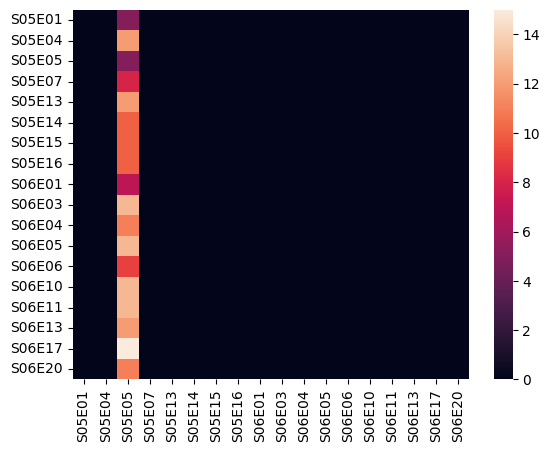

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: MLP")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("hidden_layer_sizes = ", hidden_layer_sizes)
print("alpha = ", alpha)
print("activation = ", activation)
print("max_iter = ", max_iter)

df.head()

--------------------------------
Metodo de clasificacion: MLP
--------------------------------
Hiperparametros utilizados:
test_size =  0.35
random_state =  5
hidden_layer_sizes =  (100, 200, 100, 30)
alpha =  0.01
activation =  logistic
max_iter =  40


,Métrica,Valor
0,Exactitud,0.026455
1,Precisión,0.026455
2,Recall,0.026455
3,F1-score,0.026455
4,Tiempo de ejecución,78.501088


### **2. Experimento_02**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.23
random_state=8
hidden_layer_sizes=(500, 200, 100, 80)
alpha=0.035
activation='tanh'
max_iter=75

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha, activation=activation, max_iter=max_iter)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  5  0  0  0  0  0

<Axes: >

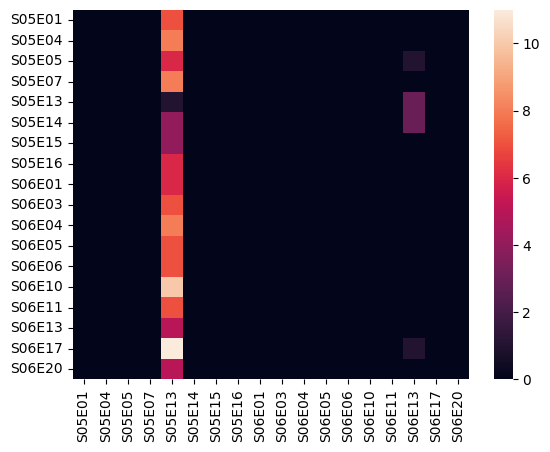

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: MLP")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("hidden_layer_sizes = ", hidden_layer_sizes)
print("alpha = ", alpha)
print("activation = ", activation)
print("max_iter = ", max_iter)

df.head()

--------------------------------
Metodo de clasificacion: MLP
--------------------------------
Hiperparametros utilizados:
test_size =  0.23
random_state =  8
hidden_layer_sizes =  (500, 200, 100, 80)
alpha =  0.035
activation =  tanh
max_iter =  75


,Métrica,Valor
0,Exactitud,0.008000
1,Precisión,0.008000
2,Recall,0.008000
3,F1-score,0.008000
4,Tiempo de ejecución,152.608927


### **3. Experimento_03**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.38
random_state=5
hidden_layer_sizes=(1500, 100, 200, 100, 30)
alpha=0.035
activation='relu'
max_iter=55

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    alpha=alpha, activation=activation, max_iter=max_iter)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0

<Axes: >

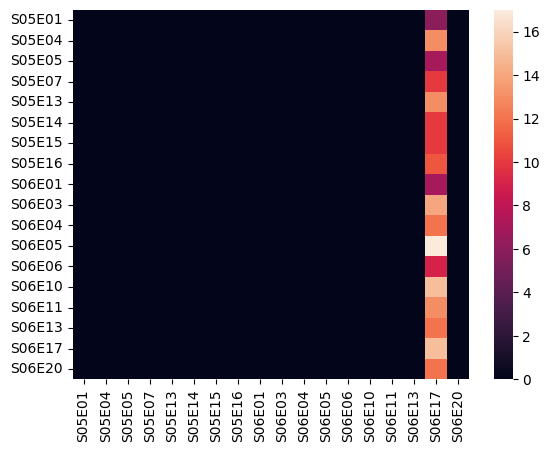

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: MLP")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("hidden_layer_sizes = ", hidden_layer_sizes)
print("alpha = ", alpha)
print("activation = ", activation)
print("max_iter = ", max_iter)

df.head()

--------------------------------
Metodo de clasificacion: MLP
--------------------------------
Hiperparametros utilizados:
test_size =  0.38
random_state =  5
hidden_layer_sizes =  (1500, 100, 200, 100, 30)
alpha =  0.035
activation =  relu
max_iter =  55


,Métrica,Valor
0,Exactitud,0.072816
1,Precisión,0.072816
2,Recall,0.072816
3,F1-score,0.072816
4,Tiempo de ejecución,385.907732


## **f) Modelo 6 - SVM**

### **1. Experimento_01**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.svm import SVC

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.30
random_state= 8
C = 4
kernel = 'linear'
gamma = 0.5

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = SVC(kernel = kernel, C = C, gamma = gamma)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 5  2  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  0  0  1  1  0  1  0  0  0  0  0  0  2  1]
 [ 0  2  0  6  0  0  1  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  5  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  1  0  0  0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  2  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  5  0  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  4  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  5  0  0  4  1  1  0  0]
 [ 0  1  0  0  0  3  0  0  0  0  3  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  4  0  0]
 [ 1  0  1  0  2  4  0  0  0  0  0  0  1  0  0  0  4  0]
 [ 0  0  0  0  2  0  1  0  0  0

<Axes: >

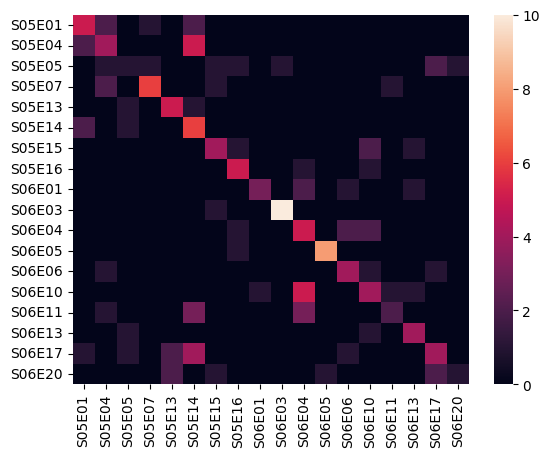

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: SVM")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("kernel = ", kernel)
print("C = ", C)
print("gamma = ", gamma)

df.head()

--------------------------------
Metodo de clasificacion: SVM
--------------------------------
Hiperparametros utilizados:
test_size =  0.3
random_state =  8
kernel =  linear
C =  4
gamma =  0.5


,Métrica,Valor
0,Exactitud,0.500000
1,Precisión,0.500000
2,Recall,0.500000
3,F1-score,0.500000
4,Tiempo de ejecución,43.756085


### **2. Experimento_02**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.svm import SVC

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.20
random_state=50
C = 10
kernel = 'poly'
gamma = 0.001

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = SVC(kernel = kernel, C = C, gamma = gamma)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 4 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 5 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 2 0 1 2 0 2 0 0]
 [0 0 0 1 0 1 0 0 2 0 2 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 2 1]
 [0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]]


<Axes: >

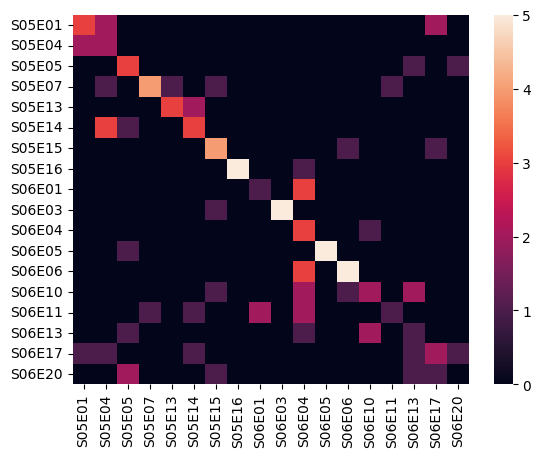

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: SVM")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("kernel = ", kernel)
print("C = ", C)
print("gamma = ", gamma)

df.head()

--------------------------------
Metodo de clasificacion: SVM
--------------------------------
Hiperparametros utilizados:
test_size =  0.2
random_state =  50
kernel =  poly
C =  10
gamma =  0.001


,Métrica,Valor
0,Exactitud,0.481481
1,Precisión,0.481481
2,Recall,0.481481
3,F1-score,0.481481
4,Tiempo de ejecución,30.337919


### **3. Experimento_03**

#### Ejecución

In [ ]:
import time
from sklearn.model_selection import train_test_split
# Perceptrón multicapa para clasificación
from sklearn.svm import SVC

# Separación de datos en entrada y salida
X = datos.drop(['90000'], axis=1)
y = datos['90000']

# Definimos los hiperparametros
test_size = 0.39
random_state= 1
C = 7
kernel = 'linear'
gamma = 0.5

# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# Definición del modelo
# diseño de MLP
Modelo = SVC(kernel = kernel, C = C, gamma = gamma)

inicio = time.time()
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
tiempo = time.time() - inicio

#### Matriz de confusion

In [ ]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 4  5  0  1  0  3  0  0  0  0  0  0  0  0  0  1  1  0]
 [ 0  5  0  0  0  1  0  0  0  0  0  0  0  2  0  1  0  0]
 [ 0  0  3  1  2  1  2  0  0  1  0  0  0  0  0  0  2  2]
 [ 0  1  0  8  0  1  0  1  0  0  0  0  0  0  1  0  1  0]
 [ 1  0  0  0  8  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  2  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  2  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  0  7  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  1  0  1  2  0  2  0  0]
 [ 0  0  0  0  0  0  1  0  0 11  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  0  6  0  0  1  0  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  1  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  9  2  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  2  0  0  5  1  4  0  0]
 [ 0  1  0  0  0  1  2  0  1  0  2  1  0  2  0  3  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  2  0  0  1  0  4  2  0]
 [ 1  1  1  0  3  0  0  0  0  0  0  0  1  1  0  0  4  0]
 [ 0  0  0  0  1  0  1  1  0  0

<Axes: >

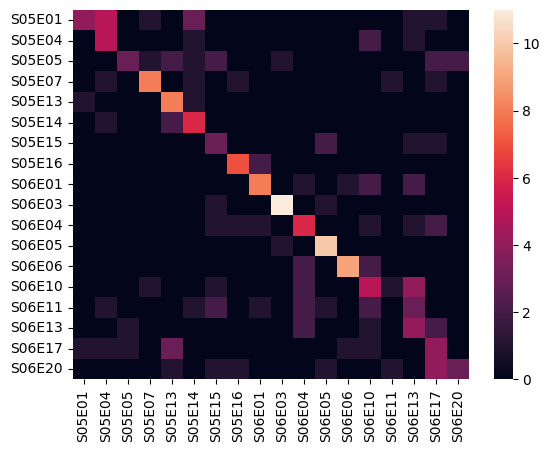

In [ ]:
categorias = ['S05E01','S05E04','S05E05','S05E07','S05E13','S05E14','S05E15','S05E16','S06E01','S06E03','S06E04','S06E05','S06E06','S06E10','S06E11','S06E13','S06E17','S06E20']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

#### Tabla resumen del Experimento

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cálculo de las métricas
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
recall = recall_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades
f1 = f1_score(y_test, pred, average='micro')  # Modificar el valor de 'average' según tus necesidades

# Creación del DataFrame
data = {'Métrica': ['Exactitud', 'Precisión', 'Recall', 'F1-score', 'Tiempo de ejecución'],
        'Valor': [accuracy, precision, recall, f1, tiempo]}
df = pd.DataFrame(data)

# Mostramos los Hiperparametros utilizados para el experimento y sus metricas
print("--------------------------------")
print("Metodo de clasificacion: SVM")
print("--------------------------------")
print("Hiperparametros utilizados:")
print("test_size = ", test_size)
print("random_state = ", random_state)
print("kernel = ", kernel)
print("C = ", C)
print("gamma = ", gamma)

df.head()

--------------------------------
Metodo de clasificacion: SVM
--------------------------------
Hiperparametros utilizados:
test_size =  0.39
random_state =  1
kernel =  linear
C =  7
gamma =  0.5


,Métrica,Valor
0,Exactitud,0.492891
1,Precisión,0.492891
2,Recall,0.492891
3,F1-score,0.492891
4,Tiempo de ejecución,21.337490


# **Tabla resumen**

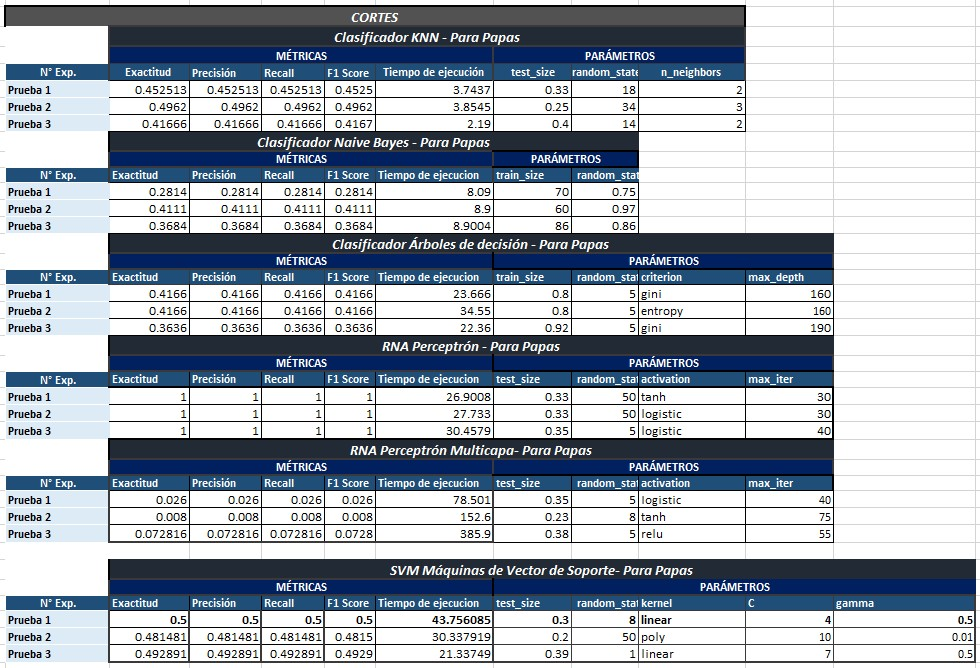

# **Conclusiones preliminares de la etapa de experimentacion**

1.   Si se realiza un ranking de las metricas que nos proporcionan los modelos se puede observar que quien mejores resultados presenta en promedio en cuantos a los experimentos realizados es el modelo de SVM pero podemos ver que en la Pueba 3 del modelo KNN se obserba el mayor puntaje obtenido global para esa configuracion del clasificador.
2. Se pudo percibir que los modelos que mas rapido se entrenan son los de KNN y Naive Bayes seguido por árboles de desición y SVM los cuales a su vez nos dan buenas metricas para este problema de clasificacion.
3. Los modelos que mas tardan en ejecutarse son los de Perceptron y MLP esto devido a la naturaleza del algoritmo, ademas nos dan muy malas metricas con los cual no valdria la pena usar estos modelos.
4. El que Perceptron y MLP nos den malos resultados se da por la naturaleza del algoritmo ya que estos modelos se utilizan para CLASIFICACION BINARIA esto debido a la funcion de aceptacion que se utiliza ya que nos da valores entre 0 y 1 con la ventaja de que el calculo de su derivada y por tanto la retropropagacion se haga de mejor manera.
5. Podemos solucionar el problema de el Perceptron y de MLP colocando una funcion softmax en la ultima capa del modelo pero esto, a consideracion personal, no seria recomendable ya que el calculo de la derivada se hace muy complicado y muy costoso computacionalmente por lo que no valdria la pena ademas conociendo que otros modelos nos realizan mucho mejor este trabajo.
6. Se opto por no utilizar para esta evaliacion de modelos CNN debido a que, despues de realizar pruebas se observo que el colab no soporta realizar el entrenamiento de este modelo ademas que por la cantidad de datos que tenemos el entrenar este modelo se aria demaciado costoso a pesar de tener una probabilidad mas alta de obtener buenas metricas, despues de probarlo, se opto por no realizar.
7. Se pudo observar que el rendimiento de los modelos baja al utilizarlos en el dataset de cortes, creemos que esto se puede deber a que las caracteristicas particulares de cada especie de papa son menos visibles al realizar el corte transevrsal, los colores son mas parecido al igual que las formas lo que puede hacer mas complicado la deteccion de caracteristicas para poder clasificar las clases.

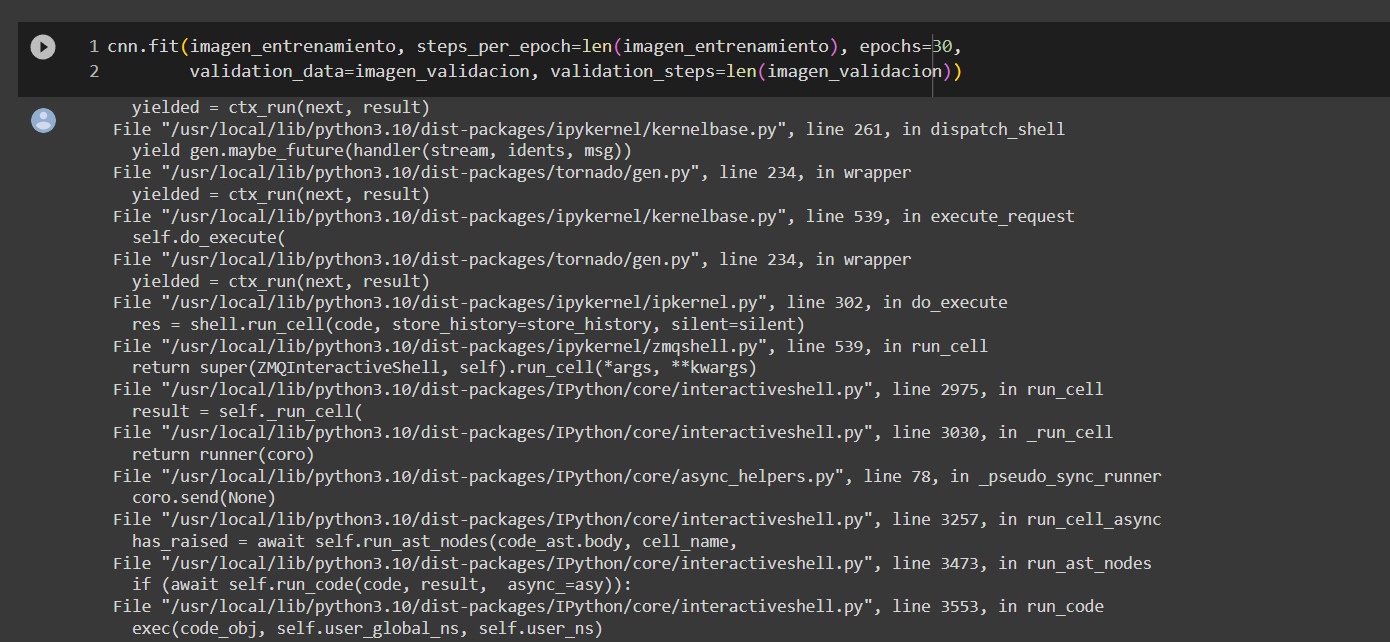